# Chapter 2: Basic Image Pre-processing operations

## Introduction

The world we see is colorful and vibrant, but sometimes, removing color provides clarity. Converting images to grayscale is a foundational concept in image processing. By eliminating color information, we reduce an image's complexity, emphasizing structure, shapes, and textures. Grayscale images are not merely a throwback to the black-and-white era; they serve as a vital preprocessing step for many computer vision tasks and reduce computational overhead by working with a single channel instead of three (RGB).


In this chapter, we'll delve into fundamental image processing techniques that help in preparing image data for machine learning tasks.  These techniques help increase the variability and diversity of the training data, leading to better model generalization and performance.

**Learning Objectives:**

- **Convert images to grayscale:** can be helpful in simplifying image processing tasks by removing color information and working only with the intensity or brightness values.


- **Resize an crop images:** which is useful for various purposes like reducing file size, matching specific dimensions for a particular application, or preparing images for machine learning models that require a consistent input size.


- **Perform basic image augmentations like flipping and rotations** which can be employed for data augmentation in computer vision tasks such as training deep learning models.


In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf


## Grayscale Conversion

Images in full color have three channels (RGB) that represent the colors in the image. Converting these to grayscale reduces them to a single channel, simplifying the data and reducing the computational power required.

In other terms, converting an image to grayscale reduces its size and complexity. In many applications, color might not be a significant feature, and grayscale images suffice.

Let's see how we can convert a color image to grayscale.


In [2]:
#image_path = "data/image_classroom.jpg"  # Replace with the path to your image
image_path_1 ='data/elephant_in_kenya.jpg'

**Using openCV**

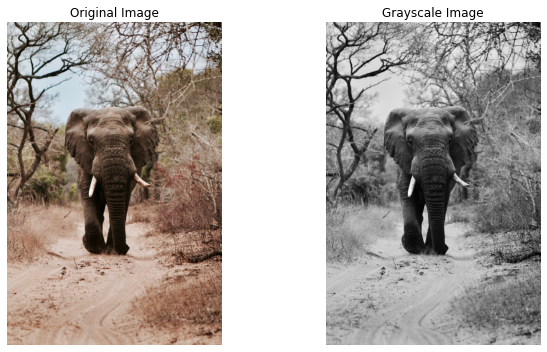

In [3]:
import cv2

image_cv = cv2.imread(image_path_1)
image_cv_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

#grayscale_image_cv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
gray_image_cv = cv2.cvtColor(image_cv_rgb, cv2.COLOR_RGB2GRAY)

# Displaying the original and grayscale images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_cv_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image_cv, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.tight_layout()
plt.show()


In [5]:
print( image_cv_rgb.shape ,gray_image_cv.shape )   

(3648, 2432, 3) (3648, 2432)


**Using TF**

In [6]:
image_path_2 ='data/african_ceremony.jpg'


image_= tf.io.read_file(image_path_2)
image_tf = tf.image.decode_jpeg(image_)
grayscale_image_tf = tf.image.rgb_to_grayscale(image_tf)

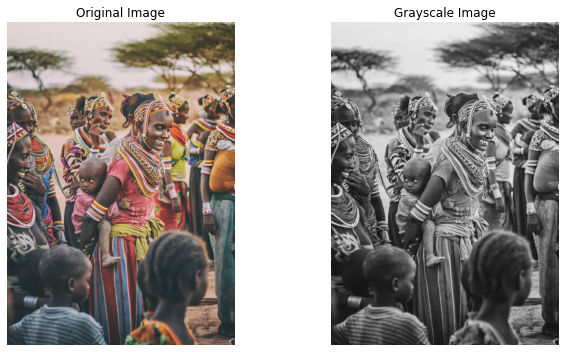

In [7]:
#grayscale_image_toNumpy = 
# Displaying the original and grayscale images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_tf.numpy())
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(grayscale_image_tf.numpy(), cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
print( image_tf.shape ,grayscale_image_tf.shape )   

(4259, 3001, 3) (4259, 3001, 1)


## Image Resizing


Resizing images ensures that all images have a consistent size, which is especially important when feeding them to machine learning models. Let's resize our image. It is crucial, especially when working with neural networks, as they require input images to have a consistent size.


The importance of Image Resizing includes:

* Consistency in input dimensions
* Faster computation with smaller images
* Can focus on finer details or broader structures depending on size

**Using OpenCV**

In [9]:
image_path_3 ='data/boy_showing_hands.jpg'

image_cv = cv2.imread(image_path_3)

image_cv_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

In [10]:
# Resize the image to a fixed size (e.g., 150x150)
resized_image_cv = cv2.resize(image_cv_rgb, (150, 150))

In [11]:
resized_image_cv.shape

(150, 150, 3)

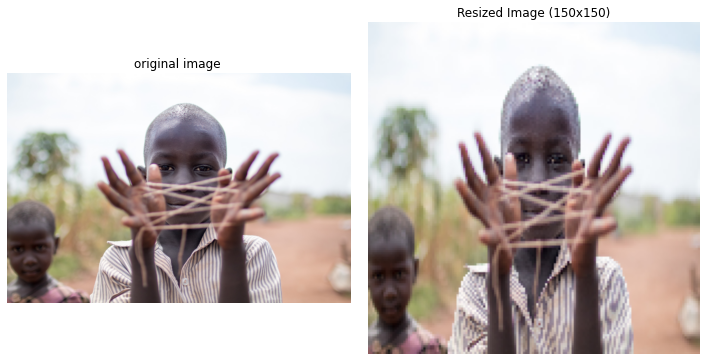

In [12]:
# Displaying the original and grayscale images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_cv_rgb)
plt.title("original image ")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image_cv)
plt.title("Resized Image (150x150)")
plt.axis('off')

plt.tight_layout()
plt.show()

In [13]:
print(resized_image_cv.shape)


(150, 150, 3)


**Using TF**

In [14]:
image_path_4 ='data/children_at_school.jpg'
image_= tf.io.read_file(image_path_4)
image_tf = tf.image.decode_jpeg(image_)

In [15]:
image_tf.shape

TensorShape([3240, 5760, 3])

In [16]:
new_size = [500, 500]
resized_image_tf = tf.image.resize(image_tf, new_size)
print(resized_image_tf.shape)

(500, 500, 3)


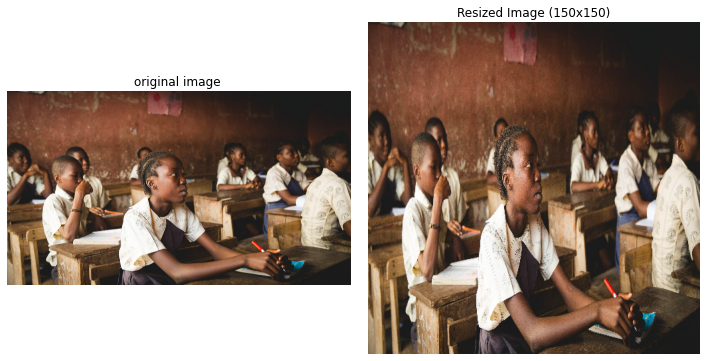

In [17]:
# Displaying the original and grayscale images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_tf.numpy())
plt.title("original image ")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image_tf.numpy().astype('uint8'))
plt.title("Resized Image (150x150)")
plt.axis('off')

plt.tight_layout()
plt.show()

## Image Cropping

### Why Crop Images?

Cropping refers to the removal of the outer parts of an image to enhance framing, accentuate subject matter, or change aspect ratio. Here are some reasons why cropping is beneficial:


1. **Focus on the Subject**: In many images, especially those taken in real-world scenarios, the main subject might be off-center or surrounded by unnecessary details. Cropping helps in bringing the focus squarely on the subject.

2. **Data Reduction**: Sometimes, only a specific region of an image contains the useful data. Cropping can help in getting rid of the extraneous parts, thereby reducing the amount of data to be processed.

3. **Removing Distractions**: Unwanted or distracting elements can divert attention from the main subject of the image. Through cropping, we can eliminate such distractions.

4. **Aspect Ratio Consistency**: When building datasets for machine learning, having consistent image dimensions and aspect ratios can be critical. Cropping helps achieve this consistency.

**Using OpenCV**

In OpenCV, cropping is achieved using NumPy slicing.

(-0.5, 3263.5, 2175.5, -0.5)

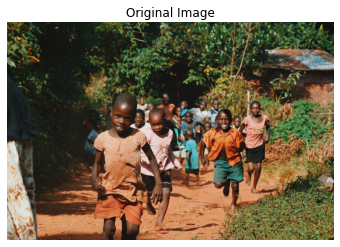

In [18]:
image_path_5 ='data/children_running.jpg'
image_cv = cv2.imread(image_path_5)
image_cv_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)



plt.imshow(image_cv_rgb.astype('uint8'))
plt.title("Original Image")
plt.axis('off')


In [19]:
image_cv_rgb.shape

(2176, 3264, 3)

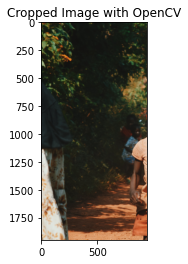

In [20]:
cropped_image_cv = image_cv_rgb[50:2000, 50:1000]
plt.imshow(cropped_image_cv)
plt.title('Cropped Image with OpenCV')
plt.show()


In [21]:
print(image_cv_rgb.shape , cropped_image_cv.shape)

(2176, 3264, 3) (1950, 950, 3)


**Using TF**

TensorFlow offers the `crop_to_bounding_box` function to crop images. To crop an image, you'll need to specify the starting pixel (both x and y) and the desired width and height for the cropped region.

(-0.5, 3839.5, 2159.5, -0.5)

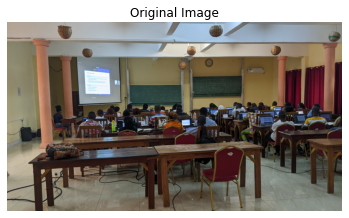

In [22]:
image_path_6 ='data/image_classroom.jpg'
image_= tf.io.read_file(image_path_6)
image_tf = tf.image.decode_jpeg(image_)


plt.imshow(image_tf.numpy().astype('uint8'))
plt.title("Original Image")
plt.axis('off')

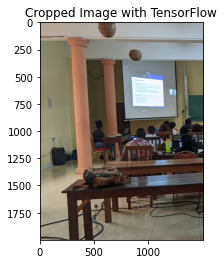

In [23]:
# Crop the image to a bounding box starting at (50,50) with width 200 and height 150
cropped_image_tf = tf.image.crop_to_bounding_box(image_tf, offset_height=50, offset_width=50, 
                                                 target_height=2000, target_width=1500)

plt.imshow(cropped_image_tf.numpy())
plt.title('Cropped Image with TensorFlow')
plt.show()


In [24]:
print(image_tf.shape , cropped_image_tf.shape)

(2160, 3840, 3) (2000, 1500, 3)


Cropping is a valuable tool in both photography and machine learning. In photography, it helps enhance the composition of the photo. In machine learning, it aids in data consistency and focus, allowing models to hone in on the essential parts of the data. It's a simple yet powerful technique that showcases the importance of preprocessing in the image processing pipeline.

>#### <font color=#800080>Task 2:</font> <a class="anchor" id="Task-1"></a>


## Crop Disease Identification (Agriculture)

In various parts of Africa, farmers heavily rely on visual inspection to detect and diagnose plant diseases. They often photograph affected plants using smartphones and share them with agronomists for diagnosis. See the folder `agri_africa`. To make this process efficient, an automated system is being developed to quickly identify possible diseases. The system will use machine learning, but first, the images must be pre-processed for consistency.


1. Resizing: Given the varied nature of image captures, resize any input image to a standard size of 256x256 pixels.
2. Cropping: To ensure focus on the primary area of interest, crop the center to produce a square of 200x200 pixels.

Using tensorflow and opencv to do the work.

Hint: You might want to create function that automate those processes.

>#### <font color=#800080>Task 3:</font> <a class="anchor" id="Task-1"></a>


African art has a rich and diverse history, with countless artifacts and artworks spread across various museums and collections. With time, some artworks fade, or their details become less prominent. A project aims to use machine learning to restore these artworks. For this, the images of these artworks need standardization for consistent processing. They are stored into the `afrik_art` folder.


1. Resizing: Given artworks come in varied sizes, resize all images to a consistent dimension of 500x500 pixels.
2. Cropping: Many artworks are photographed with backgrounds (like museum walls or stands). To focus solely on the artwork, crop out a 40-pixel margin from all sides.

## Flipping and Rotating Images


Manipulating the orientation or viewpoint of images can offer valuable variability to your data. This is particularly useful when training machine learning models to ensure they generalize well. Flipping and rotating are two common methods of achieving this.

### Image Flipping

Flipping an image refers to mirroring it across a specified axis.

Why is flipping useful?

1. Data Augmentation: Especially in deep learning, more data can help improve model accuracy. Flipping can effectively double the size of your dataset.

2. Orientation Correction: In some cases, images may be captured upside down or in the wrong orientation. Flipping can help correct this.

3. Symmetry Analysis: For tasks that require analyzing symmetrical structures (like facial recognition), flipping can be a crucial preprocessing step.


**Using OpenCV**

In [25]:
image_path_7 ='data/childrens_atthe_window.jpg'
image_cv = cv2.imread(image_path_7)
image_cv_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)


# Horizontal flip
flipped_horizontally_cv = cv2.flip(image_cv_rgb, 1)

# Vertical flip
flipped_vertically_cv = cv2.flip(image_cv_rgb, 0)


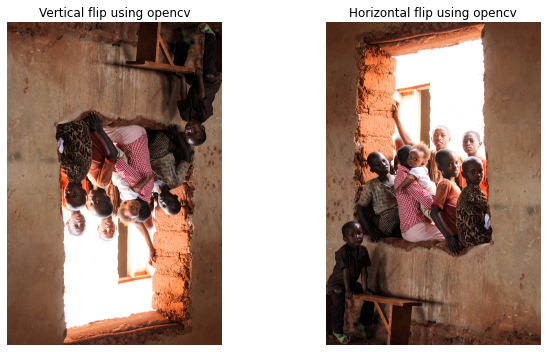

In [26]:
# Displaying the original and grayscale images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(flipped_vertically_cv)
plt.title("Vertical flip using opencv")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(flipped_horizontally_cv)
plt.title("Horizontal flip using opencv")
plt.axis('off')

plt.tight_layout()
plt.show()

In [27]:
print(flipped_horizontally_cv.shape   , flipped_horizontally_cv.shape)

(5184, 3456, 3) (5184, 3456, 3)


**Using TF**

In [28]:
image_path_8 ='data/man_inthe_hood.jpg'
image_= tf.io.read_file(image_path_8)
image_tf = tf.image.decode_jpeg(image_)

In [29]:
# Horizontal flip
flipped_horizontally_tf = tf.image.flip_left_right(image_tf)

# Vertical flip
flipped_vertically_tf = tf.image.flip_up_down(image_tf)


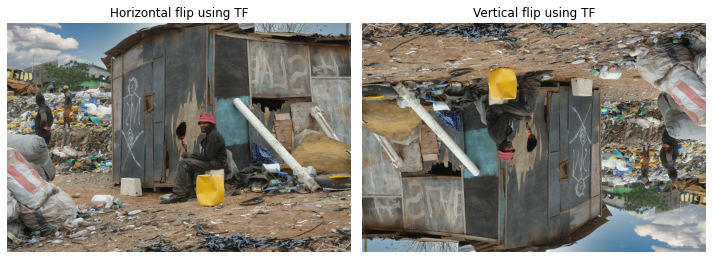

In [30]:
# Displaying the original and grayscale images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(flipped_horizontally_tf)
plt.title("Horizontal flip using TF")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(flipped_vertically_tf)
plt.title("Vertical flip using TF")
plt.axis('off')

plt.tight_layout()
plt.show()

In [31]:
print(flipped_horizontally_tf.shape   , flipped_horizontally_tf.shape)

(2592, 3888, 3) (2592, 3888, 3)


### Image Rotations and Translations: Preserving Context and Augmentation

**Rotating** and **translating** images are common preprocessing steps, especially in the realm of data augmentation. They serve multiple purposes:

1. **Context Preservation:** Rotating an image can help machine learning models learn the object of interest's orientation. For instance, a cat might be lying upside-down or sideways in some images. By training a model with various rotations, we ensure it recognizes cats irrespective of their orientation.

2. **Augmentation for Robustness:** Translations, where images are shifted, ensure models are not overly sensitive to the object's position in an image. If a model is trained with centered images of objects, it might struggle when the object is off-center.

3. **Expanding Datasets:** For datasets that are limited in size, rotations and translations can artificially increase its size, providing varied data points from the original set.



### Rotations

Rotating an image involves pivoting all its pixels about a particular point (usually the center) by a specified angle.



**Using OpenCV**

For rotations in OpenCV, we need to define a rotation matrix and then use the warpAffine function

In [32]:
image_path_9 ='data/plots_uganda.jpg'
image_cv = cv2.imread(image_path_9)
image_cv_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

In [33]:
center = (image_cv_rgb.shape[1] // 2, image_cv_rgb.shape[0] // 2)
angle_90 = 90  # degrees
scale = 1
rotation_matrix_90 = cv2.getRotationMatrix2D(center, angle_90, scale)
rotated_image_cv_90 = cv2.warpAffine(image_cv_rgb, rotation_matrix_90, (image_cv_rgb.shape[1], image_cv_rgb.shape[0]))

angle_45 = 45
scale = 1
rotation_matrix_45 = cv2.getRotationMatrix2D(center, angle_45, scale)
rotated_image_cv_45 = cv2.warpAffine(image_cv_rgb, rotation_matrix_45, (image_cv_rgb.shape[1], image_cv_rgb.shape[0]))

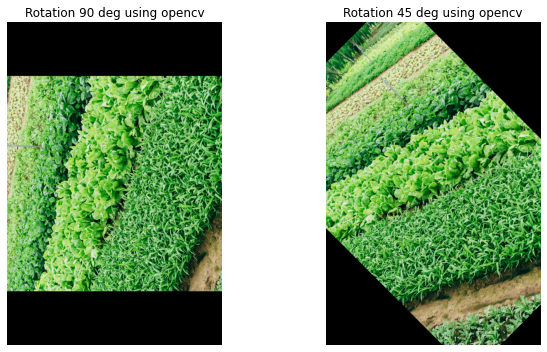

In [34]:
# Displaying the original and grayscale images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(rotated_image_cv_90)
plt.title("Rotation 90 deg using opencv")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_image_cv_45)
plt.title("Rotation 45 deg using opencv")
plt.axis('off')

plt.tight_layout()
plt.show()

In [35]:
print(rotated_image_cv_90.shape   , rotated_image_cv_45.shape)

(3072, 2048, 3) (3072, 2048, 3)


**Using TF**

In [36]:
image_path_10 ='data/pro_farmer.jpg'
image_= tf.io.read_file(image_path_10)
image_tf = tf.image.decode_jpeg(image_)

In [37]:
# Rotating 90 degrees
# k denotes the number of times the image is rotated by 90 degrees
import tensorflow_addons as tfa

rotated_image_tf_45 =  tfa.image.rotate(image_tf,45)#   tf.image.rot90(image_tf, k=1) 
rotated_image_tf_90 = tf.image.rot90(image_tf, k=1)


/home/rockefeller/.local/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


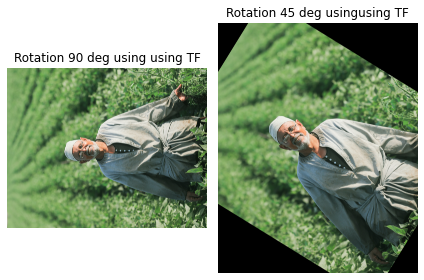

In [38]:
plt.subplot(1, 2, 1)
plt.imshow(rotated_image_tf_90)
plt.title("Rotation 90 deg using using TF")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_image_tf_45)
plt.title("Rotation 45 deg usingusing TF")
plt.axis('off')

plt.tight_layout()
plt.show()

### Translations



Translating an image means shifting it along the X and/or Y direction. It's like "sliding" the image.

**Using OpenCV**

For translations in OpenCV, we build a translation matrix and use it with the `warpAffine` function.

In [39]:
image_path_11 ='data/seed_plant.jpg'
image_cv = cv2.imread(image_path_11)
image_cv_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

In [40]:
delta_x, delta_y = 100, 100
translation_matrix = np.float32([[1, 0, delta_x], [0, 1, delta_y]])

translated_image_cv = cv2.warpAffine(image_cv_rgb, translation_matrix, 
                                     (image_cv_rgb.shape[1], image_cv_rgb.shape[0]))


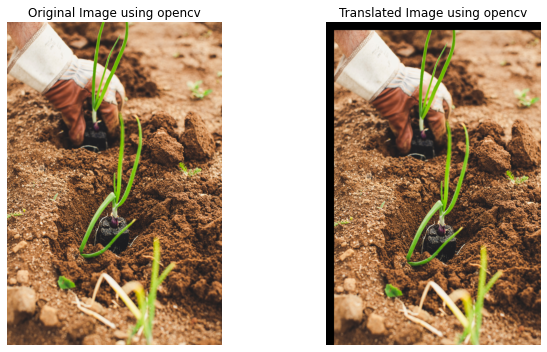

In [41]:

# Displaying the original and grayscale images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_cv_rgb)
plt.title("Original Image using opencv")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(translated_image_cv)
plt.title("Translated Image using opencv")
plt.axis('off')

plt.tight_layout()
plt.show()

**Using TF**

In [42]:
image_path_12 ='data/womanfarmer_andbaby.jpg'
image_= tf.io.read_file(image_path_12)
image_tf = tf.image.decode_jpeg(image_)

In [43]:
# Translation (shift by pixels in x and y directions)
delta_x, delta_y = 200, 200
translated_image_tf = tfa.image.translate(image_tf, [delta_x, delta_y])


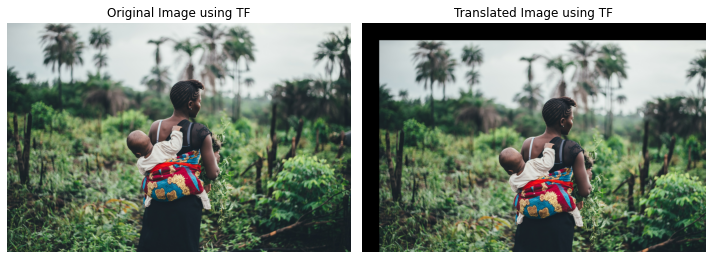

In [44]:
# Displaying the original and grayscale images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_tf.numpy())
plt.title("Original Image using TF")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(translated_image_tf.numpy())
plt.title("Translated Image using TF")
plt.axis('off')

plt.tight_layout()
plt.show()

In [45]:
print(image_tf.shape , translated_image_tf.shape)

(2662, 3999, 3) (2662, 3999, 3)


**What Happens During Rotation and Translation?**

When we rotate or translate an image, some regions might not correspond to any part of the original image. This is particularly evident in rotations, where corners can become exposed. Such regions are often filled with default values, such as zeros (black) or the boundary pixel's value.

Another point to note is that during these transformations, especially rotation, pixel values might be interpolated to determine their new values. There are different methods for this interpolation, like **nearest-neighbor**, **bilinear**, and **bicubic**. The choice of method can influence the resulting image's quality.

Both rotation and translation are pivotal in enhancing the capability of machine learning models to generalize well. They provide a means to expose models to a diverse set of data, teaching them to be robust and versatile. As with other preprocessing steps, the key is to understand the nuances of each operation and use them judiciously.

The images used in these notebooks are courtesy of  Doug Linstedt , bill wegener, Will Shirley, Alex Radelich, Annie Spratt, Ian Macharia , Jackson David, Dim Hou. All from unsplash.com
Thanks to them,